<a href="https://colab.research.google.com/github/kussy29/machine_learning/blob/main/lab01_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**



## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.






In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#import data
df=pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/master/PCA_three_clusters_data.csv"))

X=df.drop('class',axis=1).values
y=df['class'].values

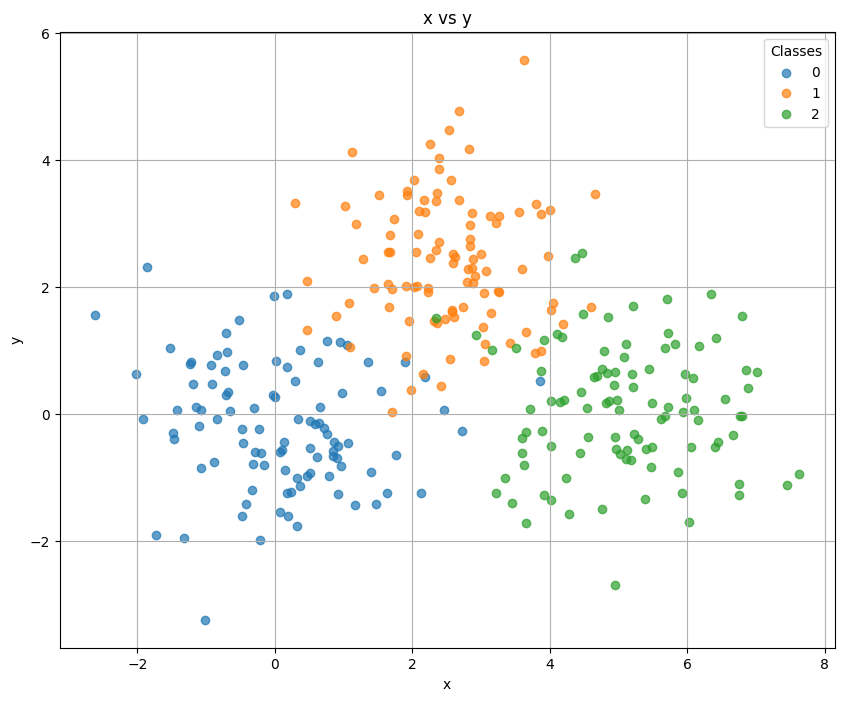

In [ ]:
plt.figure(figsize=(10, 8))
classes = np.unique(y)

for class_label in classes:
    subset = df[df['class'] == class_label]
    plt.scatter(subset['x'], subset['y'], label=class_label, alpha=0.7)


plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.legend(title="Classes")
plt.grid(True)
plt.show()



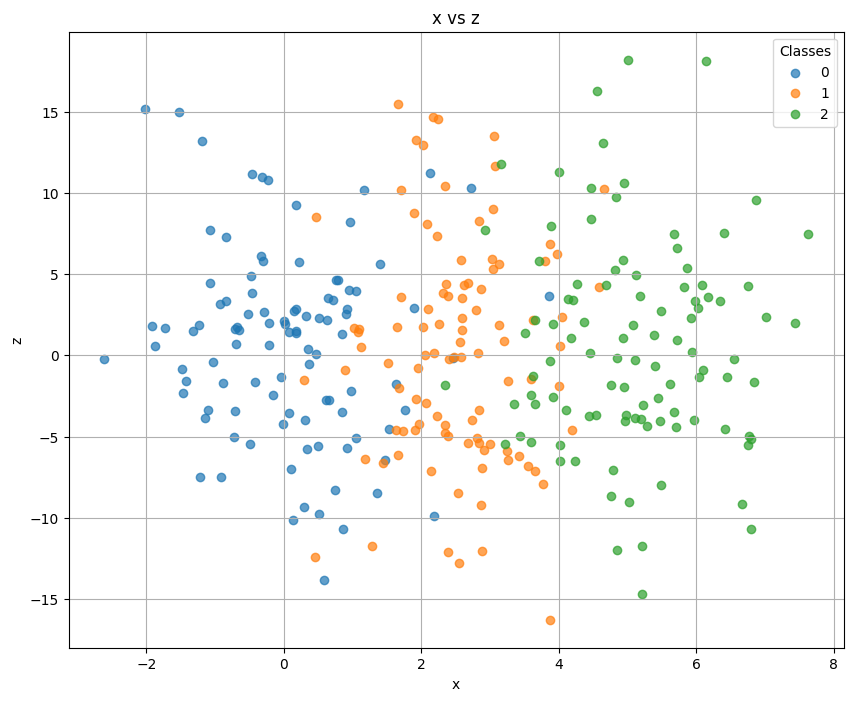

In [ ]:
plt.figure(figsize=(10, 8))
classes = np.unique(y)

for class_label in classes:
    subset = df[df['class'] == class_label]
    plt.scatter(subset['x'], subset['z'], label=class_label, alpha=0.7)


plt.xlabel("x")
plt.ylabel("z")
plt.title("x vs z")
plt.legend(title="Classes")
plt.grid(True)
plt.show()

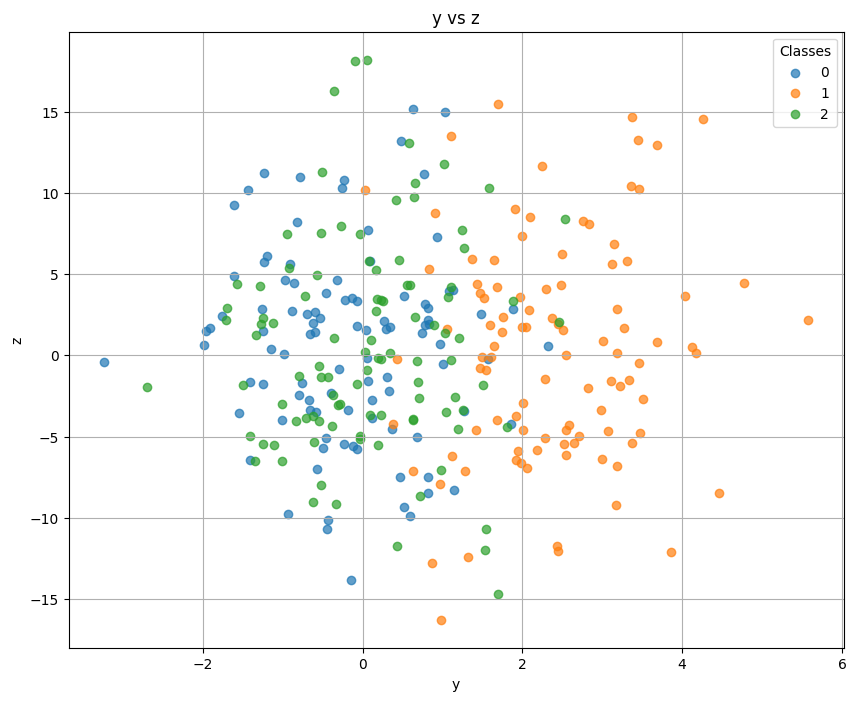

In [ ]:
plt.figure(figsize=(10, 8))
classes = np.unique(y)

for class_label in classes:
    subset = df[df['class'] == class_label]
    plt.scatter(subset['y'], subset['z'], label=class_label, alpha=0.7)


plt.xlabel("y")
plt.ylabel("z")
plt.title("y vs z")
plt.legend(title="Classes")
plt.grid(True)
plt.show()

As we can see the best distinction of classes is in 'x vs y' plot. Rest of the plots mixes classes.


the principal components in rows

[[ 0.72005783  0.56946    -0.39652494]
 [-0.02368275  0.59126692  0.80612813]]

X projected on V (first 5 rows)

[[-1.12582206  0.05986874]
 [-1.89368654  0.95808305]
 [-1.61886158  1.39907438]
 [-1.61654666 -0.01318696]
 [-2.41865284 -0.83294294]]

Explained percentage variance

[0.34722276 0.33441835]

Cumulative explained percentage variance

[0.34722276 0.68164111]


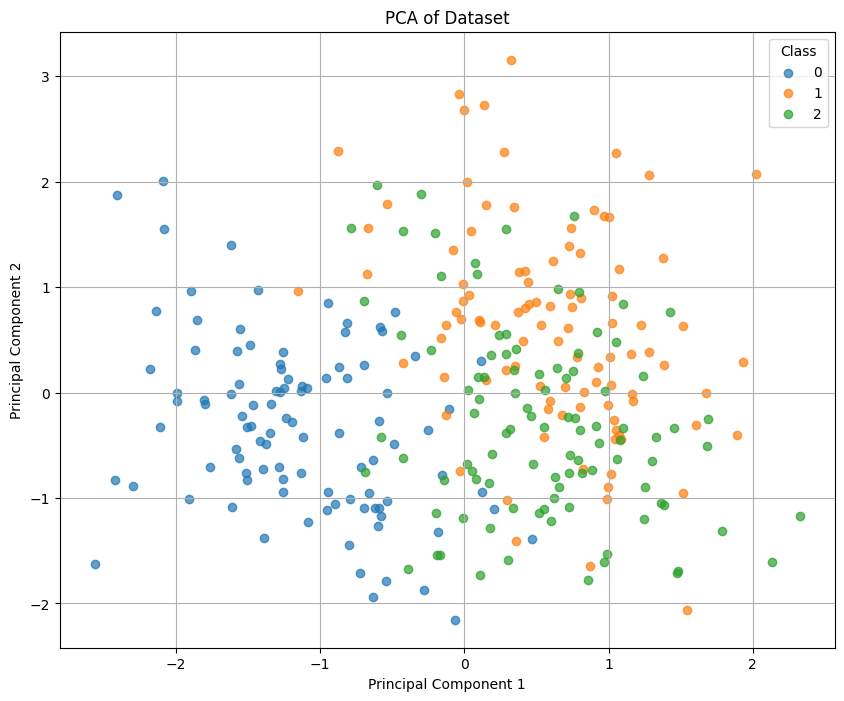

In [ ]:

# Center and standardize the data before applying PCA
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA and reduce the data to 2 components for visualization
pca = PCA(n_components = 2)
XV = pca.fit_transform(X)


print("\nthe principal components in rows\n")
print(pca.components_)

print("\nX projected on V (first 5 rows)\n")
print(XV[:5,:])
print("\nExplained percentage variance\n")
print(pca.explained_variance_ratio_)
print("\nCumulative explained percentage variance\n")
print(np.cumsum(pca.explained_variance_ratio_))

# Plot the PCA results with color coding by wine class
plt.figure(figsize=(10, 8))
for class_label in classes:
    plt.scatter(XV[y==class_label,0], XV[y==class_label,1], label=class_label, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Dataset")
plt.legend(title="Class")
plt.grid(True)
plt.show()


However PCA is much worse than 'x vs y' and 'x vs z' in classification. Mainly because z component doesn't explain classes much as we can see from plots 'x vs z' and 'y vs z' and it's taken into consideration in PCA equally.

Secondly, variance explained by PCA it's only a little bit bigger than 2/3. It's because those variables aren't correlated as we can see in cell below.

In [ ]:
#Correlation matrix
x=df.drop('class',axis=1)
x.corr()

,x,y,z
x,1.000000,0.034832,-0.025644
y,0.034832,1.000000,0.003411
z,-0.025644,0.003411,1.000000


#### Question 2

Let's look like how lack of scalling impacts PCA. As we can see from 3d plot and standard deviation table below it z has much bigger variance than x and y. So it should impact PCA more.

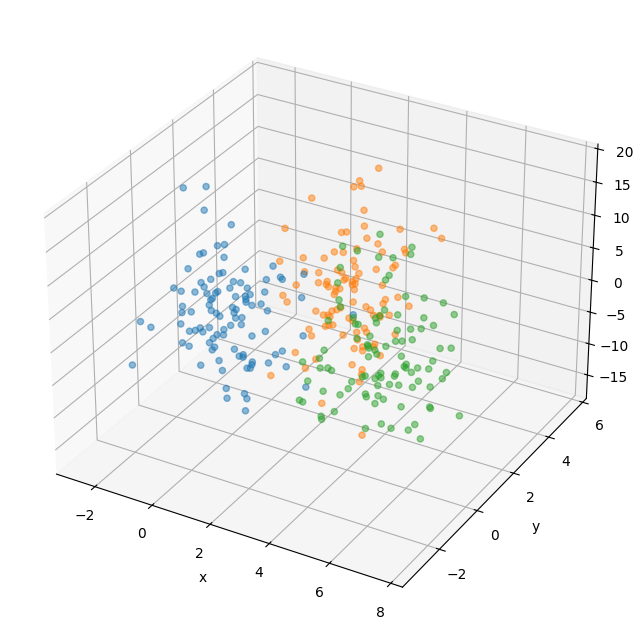

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

for class_label in classes:
    subset = df[df['class'] == class_label]
    ax.scatter(subset['x'],subset['y'], subset['z'], label=class_label, alpha=0.5)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid(True)
plt.show()

In [ ]:
X_2=df.drop('class',axis=1).values
X_2.std(axis=0)

array([2.29653432, 1.52685818, 6.31597484])


the principal components in rows

[[-1.07398893e-02  8.40647979e-04  9.99941972e-01]
 [ 9.99078354e-01  4.15697634e-02  1.06956660e-02]]

X projected on V (first 5 rows)

[[ 3.05824099 -1.91725482]
 [10.3243579  -2.72463364]
 [10.72497785 -2.91386929]
 [ 3.39408622 -3.03969616]
 [ 1.28096705 -4.3807283 ]]

Real values of X (first 5 rows)

[[ 0.64768854 -0.1382643   3.51229946]
 [-0.23413696 -0.23415337 10.76944739]
 [-0.46947439  0.76743473 11.16672091]
 [-0.46572975 -0.46341769  3.83647886]
 [-1.72491783 -1.91328024  1.71093163]]

Explained percentage variance

[0.83996129 0.11106345]

Cumulative explained percentage variance

[0.83996129 0.95102474]


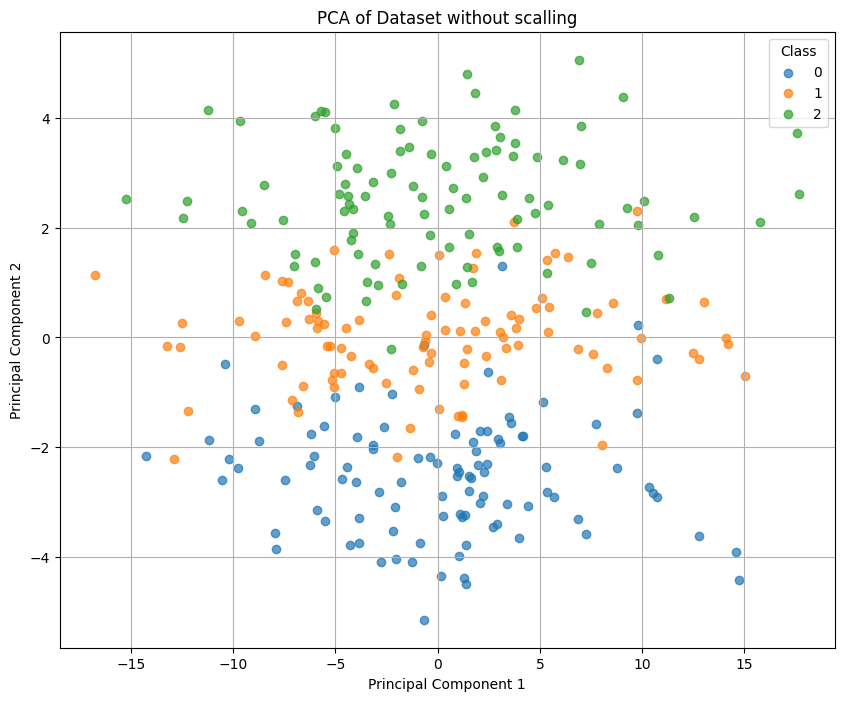

In [ ]:
# Perform PCA and reduce the data to 2 components for visualization
pca = PCA(n_components = 2)
XV = pca.fit_transform(X_2)


print("\nthe principal components in rows\n")
print(pca.components_)

print("\nX projected on V (first 5 rows)\n")
print(XV[:5,:])
print("\nReal values of X (first 5 rows)\n")
print(X_2[:5,:])
print("\nExplained percentage variance\n")
print(pca.explained_variance_ratio_)
print("\nCumulative explained percentage variance\n")
print(np.cumsum(pca.explained_variance_ratio_))

# Plot the PCA results with color coding by wine class
plt.figure(figsize=(10, 8))
for class_label in classes:
    plt.scatter(XV[y==class_label,0], XV[y==class_label,1], label=class_label, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Dataset without scalling")
plt.legend(title="Class")
plt.grid(True)
plt.show()

As we can see from this example, because PCA it's much more impacted by z it predicts variance better with 83% using only 1 component and 95% using 2. It's because first component predicts mostly variable z (first row of V is equal to $[-0.01,0.008,1]$). Second component predicts mostly x, because it has bigger variance and x,y,z are uncorrelated (second row of V is equal to $[1,0.04,0.01]$. That's the reason why it predicts classes better than original PCA, because x predicts them well.